# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Parse the website
html = browser.html
# Create a Beautiful Soup object
html_soup = soup(html, 'html.parser')
html_soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [5]:
# Extract all rows of data
rows = html_soup.find_all('tr')
rows

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
#the easy way to turn this table into a pandas df
#use pandas to read the html
df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')
#select the first table on the page
mars_temp_df = df[0]
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [7]:
# Loop through the scraped data to create a list of rows

#extract the data-row rows from html_soup; this gives us all 
#other rows that are not header rows
all_data_rows = html_soup.find_all('tr', class_='data-row')
#all_data_rows

#all_data_rows looks like this:
#[<tr class="data-row">
 #<td>2</td>
 #<td>2012-08-16</td>
 #<td>10</td>
 #<td>155</td>
 #<td>6</td>
 #<td>-75.0</td>
 #<td>739.0</td>
 #</tr>, ....etc...]

 #now we need to break out the tds for each row and place these into a list. This will create a list of lists. 
 # This is done in td_data

#create a list to hold the td data from al_data_rows
tds_data = []
#loop through the rows to get the tds
for row in all_data_rows:
    #get all tds for a single row
    tds = row.find_all('td')
    #loop through that row's tds to get just the td text
    td_list = [td.text for td in tds]
    #append the td_list (td text only) for the row to the tds_data list
    tds_data.append(td_list)
tds_data

#A note ON THE ABOVE
#tds_data without the td_list comprehension returns the following. Therefore, the td_list comprehension was added 
# to get the td text without the html tags
#[[<td>2</td>,
#  <td>2012-08-16</td>,
#  <td>10</td>,
#  <td>155</td>,
#  <td>6</td>,
#  <td>-75.0</td>,
#  <td>739.0</td>], [...], [...], etc]



[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [8]:
#extract the table header row from rows
t_headers = rows[0]
#find all the th elements from t_headers
headers = t_headers.find_all('th')

#create a list for storing the column headers
column_headers = []

#loop through each th element from headers 
for header in headers:
    #extract the th text
    header = header.text
    #append the th text to the column_headers list
    column_headers.append(header)
#show the list for QC purposes
column_headers 

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temp_df2 = pd.DataFrame(data=tds_data, columns=column_headers)

In [10]:
# Confirm DataFrame was created successfully
mars_temp_df2

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
mars_temp_df2.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis
mars_temp_df2['id'] = mars_temp_df2['id'].astype('int')
mars_temp_df2['terrestrial_date'] = mars_temp_df2['terrestrial_date'].astype('datetime64')
mars_temp_df2['sol'] = mars_temp_df2['sol'].astype('int')
mars_temp_df2['ls'] = mars_temp_df2['ls'].astype('int')
mars_temp_df2['month'] = mars_temp_df2['month'].astype('int')
mars_temp_df2['min_temp'] = mars_temp_df2['min_temp'].astype('float')
mars_temp_df2['pressure'] = mars_temp_df2['pressure'].astype('float')

In [13]:
# Confirm type changes were successful by examining data types again
mars_temp_df2.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
mars_months = len(pd.unique(mars_temp_df2['month']))
print(f"There are {mars_months} months on Mars.")


There are 12 months on Mars.


In [15]:
# 2. How many Martian days' worth of data are there?
martian_days_data = len(pd.unique(mars_temp_df2['sol']))
print(f"There are {martian_days_data} Martian days' worth of data in the dataset.")

There are 1867 Martian days' worth of data in the dataset.


In [16]:
# 3. What is the average low temperature by month?

#copy the mars_temp_df2 because I do not want to modify the existing one
low_temps_df = mars_temp_df2.copy()

#create a new dataframe, avg_temps_df
#this dataframe is grouped by month and contains the average min_temp for each month
#using the format Df.groupby(['column you want to group by])['column you want info on].mathfunction()
avg_temps_df = pd.DataFrame(low_temps_df.groupby(['month'])['min_temp'].mean())

#output the
avg_temps_df

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


<AxesSubplot:xlabel='month'>

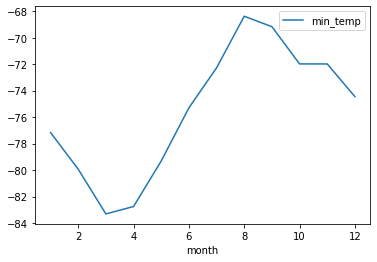

In [17]:
# Plot the average temperature by month
avg_temps_df.plot()


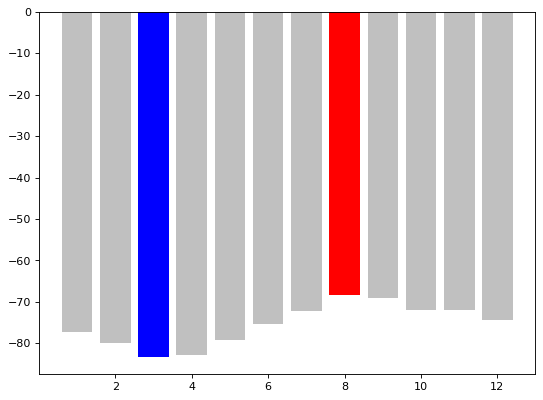

The bar chart shows that Martian Month 3 is the coldest and Martian Month 8 is the hottest, relatively speaking.


In [18]:
# Identify the coldest and hottest months in Curiosity's location
y_values = avg_temps_df['min_temp']
x_values = avg_temps_df.index
colors = ['red' if (x == max(y_values)) else 'blue' if (x == min(y_values)) else 'silver' for x in y_values]
figure(figsize=(8, 6), dpi=80)
plt.bar(x_values, y_values, color=colors, width=.8)
plt.show()
print(f"The bar chart shows that Martian Month 3 is the coldest and Martian Month 8 is the hottest, relatively speaking.")

In [19]:
# 4. Average pressure by Martian month

#copy the mars_temp_df2 because I do not want to modify the existing one
pressure_df = mars_temp_df2.copy()

#create a new dataframe, avg_temps_df
#this dataframe is grouped by month and contains the average pressure for each month
#using the format Df.groupby(['column you want to group by])['column you want info on].mathfunction()
avg_pressure_df = pd.DataFrame(pressure_df.groupby(['month'])['pressure'].mean())

#output the dataframe
avg_pressure_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


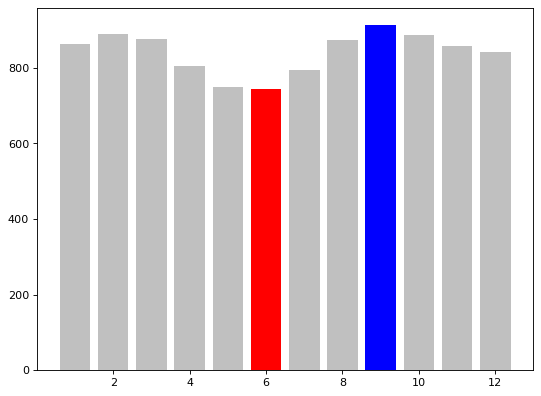

The bar chart shows that Martian Month 6 has the lowest pressure and Martian Month 9 has the highest.


In [20]:
# Plot the average pressure by month
y_values = avg_pressure_df['pressure']
x_values = avg_pressure_df.index
colors = ['blue' if (x == max(y_values)) else 'red' if (x == min(y_values)) else 'silver' for x in y_values]
figure(figsize=(8, 6), dpi=80)
plt.bar(x_values, y_values, color=colors, width=.8)
plt.show()
print(f"The bar chart shows that Martian Month 6 has the lowest pressure and Martian Month 9 has the highest.")

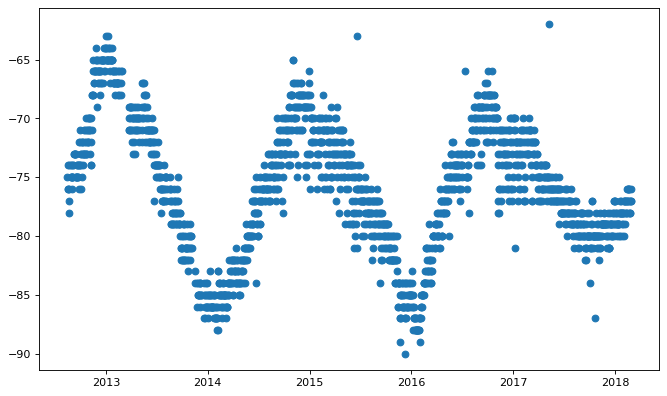

In [21]:
# 5. How many terrestrial (earth) days are there in a Martian year?

#Plot the min_temp against the terrestrial_date
#this allows us to see a full year of temps as it cycles from highest to lowest back to highest against the earth date
#roughly, there's about 2 earth years for 1 martian year
x = mars_temp_df2['terrestrial_date']
y = mars_temp_df2['min_temp']
figure(figsize=(10, 6), dpi=80)
plt.scatter(x, y, alpha=1)
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. 



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth. In either month, the pressure is low enough to instantly suffocate you and boil your blood. 

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV


In [23]:
browser.quit()